In [1]:
import numpy as np
import pymysql
import configparser
import json
import time
import matplotlib.pyplot as plt

In [2]:
ip = "139.199.102.41"
config = configparser.RawConfigParser()
config.readfp(open('../settings.cfg'))

dbname = config.get('jx3bla', 'username')
dbpwd = config.get('jx3bla', 'password')
db = pymysql.connect(ip,dbname,dbpwd,"jx3bla",port=3306,charset='utf8')
cursor = db.cursor()

d:\develop\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'parser.read_file()' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
edition = "3.5.0"
mapdetail = "25人英雄范阳夜变"

sql = """SELECT * FROM ActorStat WHERE edition>='3.5.0' AND mapdetail='454'"""
cursor.execute(sql)
result = cursor.fetchall()

In [52]:
edition = "3.5.0"
mapdetail = "25人英雄敖龙岛"

sql = """SELECT * FROM ActorStat WHERE edition>='3.5.0' AND mapdetail='428'"""
cursor.execute(sql)
result = cursor.fetchall()

In [3]:
edition = "5.1.0"
mapdetail = "25人普通达摩洞"

sql = """SELECT * FROM ActorStat WHERE edition>='%s' AND mapdetail='483'"""%edition
cursor.execute(sql)
result = cursor.fetchall()

In [6]:
print(result)

(('破阵子', '余晖', '2020-11-06', '483', '5.1.0', '052d1f607f192a5bf47b39765b62dcb8', 1, "{'effectiveDPSList': [['苏轼', '8', 91633.86470588236], ['云心无我', '10t', 55285.02352941177], ['花秋裳', '7m', 77115.17352941177], ['傍花随柳', '2d', 87029.51764705882], ['柒酱酱', '6d', 96071.5411764706], ['天青水云寂', '24', 89858.44705882353], ['嗨园子', '5d', 71259.30588235294], ['欧培拉', '6h', 0.0], ['陈绵', '3', 8073.558823529412], ['国王吉吉', '1d', 82798.93235294118], ['谁于吾欢颜', '8', 86095.35588235295], ['奚胜军', '25', 84339.76176470588], ['羡阳', '8', 94821.70294117647], ['刹一那逍遥', '8', 82949.38823529411], ['健心', '3d', 109282.17941176471], ['这不合理', '5h', 0.0], ['耆夜', '2d', 96454.7088235294], ['卿卿紫衿', '6d', 88607.71764705882], ['沧歌歌', '22h', 71339.56470588235], ['不撩妹', '1t', 0.0], ['燕懋懋', '21d', 92061.49705882353], ['唐凝曲', '7p', 88609.83823529411], ['唐郁', '7p', 115046.68235294118], ['柳沐泺', '7p', 107719.73235294118]], 'battleTime': 340, 'potList': [['苏轼', '8', 1, '余晖', '狂热崇拜值叠加：10层', ['5m13s，无尽刀狱：5层', '5m35s，无尽刀狱：5层']], ['左渭雨@飞鸢泛月

In [4]:
bossDict = {}

for line in result:
    if line[1] not in bossDict:
        bossDict[line[1]] = []
    stat = json.loads(line[7].replace("'", '"'))
    for record in stat["effectiveDPSList"]:
        bossDict[line[1]].append(record)

In [5]:
def getColor(occ):
    if occ[-1] in ['d', 't', 'h', 'p', 'm']:
        occ = occ[:-1]
    colorDict = {"0": (0, 0, 0), 
                 "1": (210, 180, 0),#少林
                 "2": (127, 31, 223),#万花
                 "4": (56, 175, 255),#纯阳
                 "5": (255, 127, 255),#七秀
                 "3": (160, 0, 0),#天策
                 "8": (255, 255, 0),#藏剑
                 "9": (205, 133, 63),#丐帮
                 "10": (253, 84, 0),#明教
                 "6": (63, 31, 159),#五毒
                 "7": (0, 133, 144),#唐门
                 "21": (180, 60, 0),#苍云
                 "22": (100, 250, 180),#长歌
                 "23": (71, 73, 166),#霸刀
                 "24": (195, 171, 227),#蓬莱
                 "25": (161, 9, 34),#凌雪
                 "211": (166, 83, 251),#衍天
                }
    if occ not in colorDict:
        occ = "0"
    return (colorDict[occ][0]/255, colorDict[occ][1]/255, colorDict[occ][2]/255)

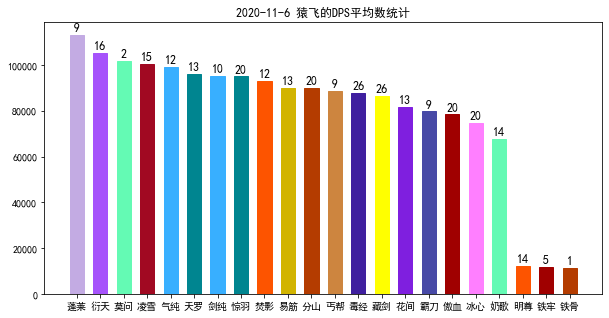

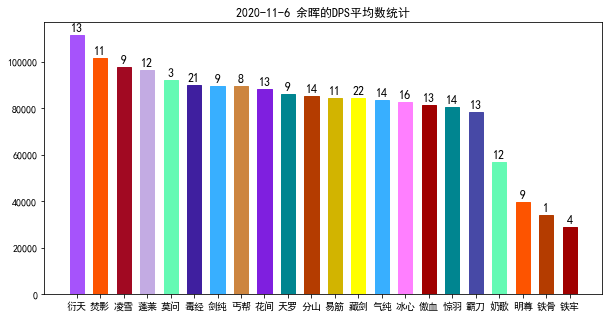

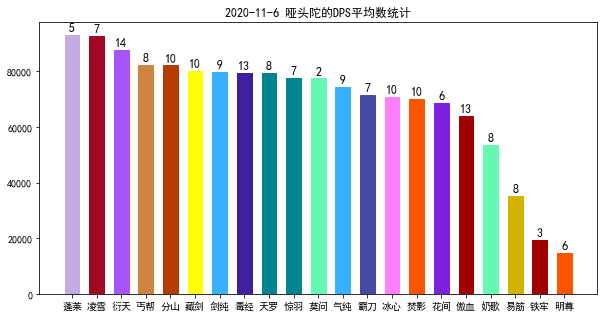

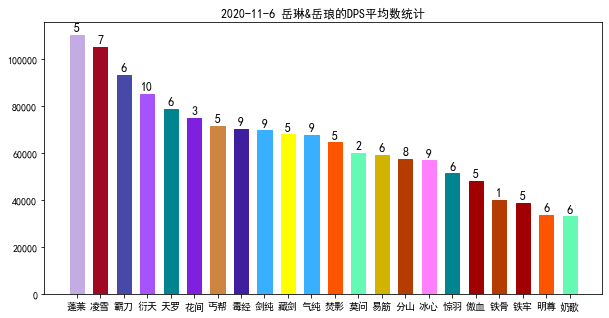

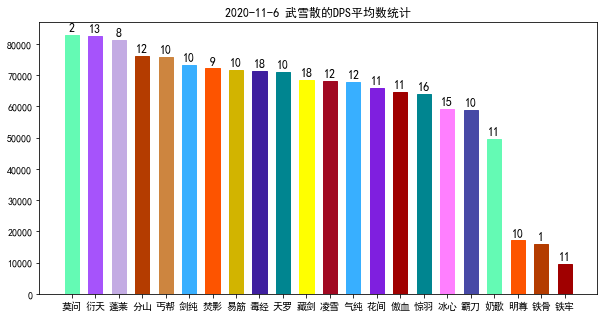

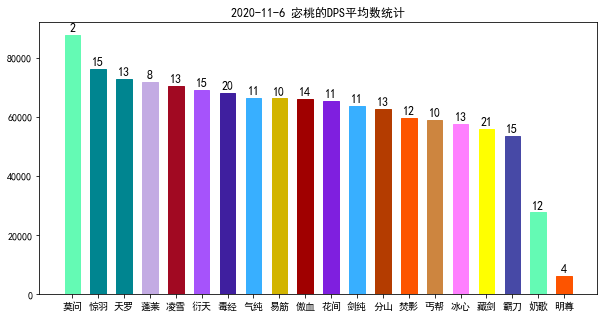

In [6]:
DPSpos = {"周贽": 2,
          "狼牙精锐": 2,
          "厌夜": 2,
          "迟驻": 5,
          "白某": 6,
          "安小逢": 2,
          "余晖": 2,
          "宓桃": 2,
          "武雪散": 2,
          "猿飞": 2,
          "哑头陀": 2,
          "岳琳&岳琅": 2,
         }

occName = {"0": (0, 0, 0), 
     "1": "少林",
     "1d": "易筋",
     "1t": "洗髓",
     "2": "万花",
     "2d": "花间",
     "2h": "奶花",
     "4": "纯阳",
     "4p": "剑纯",
     "4m": "气纯",
     "5": "七秀",
     "5d": "冰心",
     "5h": "奶秀",
     "3": "天策",
     "3d": "傲血",
     "3t": "铁牢",
     "8": "藏剑",
     "9": "丐帮",
     "10": "明教",
     "10t": "明尊",
     "10d": "焚影",
     "6": "五毒",
     "6d": "毒经",
     "6h": "补天",
     "7": "唐门",
     "7p": "惊羽",
     "7m": "天罗",
     "21": "苍云",
     "21d": "分山",
     "21t": "铁骨",
     "22": "长歌",
     "22d": "莫问",
     "22h": "奶歌",
     "23": "霸刀",
     "24": "蓬莱",
     "25": "凌雪",
     "211": "衍天",
}

for name in bossDict:
    if name == "狼牙精锐":
        continue
    if name not in DPSpos:
        DPSpos[name] = 2
    allStat = bossDict[name]
    occDict = {}
    num = 0
    for line in allStat:
        if line[1] not in occDict:
            occDict[line[1]] = []
        if line[DPSpos[name]] > 5000:
            occDict[line[1]].append(line[DPSpos[name]])
            num += 1
    table = []
    for occ in occDict:
        if len(occDict[occ]) > 0 and occ != '3':
            data = np.array(occDict[occ])
            res = [occ, occName[occ], data.shape[0], np.mean(data), np.median(data), np.max(data), np.min(data)]
            table.append(res)
    table.sort(key = lambda x: -x[3])
    #print("%s的面板DPS统计，样本数：%d"%(name, num))
    #for line in table:
    #    print(line)
        
    X = []
    Y = []
    C = []
    N = []
    plt.figure(figsize=(10,5))
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    for line in table:
        X.append(line[1])
        Y.append(line[3])
        C.append(getColor(line[0]))
        N.append(line[2])
    barlist = plt.bar(X, Y, width=0.6)
    for i in range(len(X)):
        barlist[i].set_color(C[i])
        
        plt.annotate(N[i], 
        (barlist[i].get_x() + barlist[i].get_width()/2., barlist[i].get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 12, color = 'black')
        
        
    plt.title('2020-11-6 %s的DPS平均数统计'%name)
    plt.show()

In [63]:
DPSpos = {"周贽": 2,
          "狼牙精锐": 2,
          "厌夜": 2,
          "迟驻": 5,
          "白某": 6,
          "安小逢": 2,
          "余晖": 2,
          "宓桃": 2,
          "武雪散": 2,
          "猿飞": 2,
          "哑头陀": 2,
          "岳琳&岳琅": 2,
         }

occName = {"0": (0, 0, 0), 
     "1": "少林",
     "1d": "易筋",
     "1t": "洗髓",
     "2": "万花",
     "2d": "花间",
     "2h": "奶花",
     "4": "纯阳",
     "4p": "剑纯",
     "4m": "气纯",
     "5": "七秀",
     "5d": "冰心",
     "5h": "奶秀",
     "3": "天策",
     "3d": "傲血",
     "3t": "铁牢",
     "8": "藏剑",
     "9": "丐帮",
     "10": "明教",
     "10t": "明尊",
     "10d": "焚影",
     "6": "五毒",
     "6d": "毒经",
     "6h": "补天",
     "7": "唐门",
     "7p": "惊羽",
     "7m": "天罗",
     "21": "苍云",
     "21d": "分山",
     "21t": "铁骨",
     "22": "长歌",
     "22d": "莫问",
     "22h": "奶歌",
     "23": "霸刀",
     "24": "蓬莱",
     "25": "凌雪",
     "211": "衍天",
}

resultDict = {}

for name in bossDict:
    if name == "狼牙精锐":
        continue
    if name not in DPSpos:
        DPSpos[name] = 2
    allStat = bossDict[name]
    occDict = {}
    num = 0
    for line in allStat:
        if line[1] not in occDict:
            occDict[line[1]] = []
        if line[DPSpos[name]] > 5000:
            if name == "安小逢":
                occDict[line[1]].append(line[2:9])
            else:
                occDict[line[1]].append(line[2:])
            num += 1
    table = []
    for occ in occDict:
        if occ in occName:
            if len(occDict[occ]) > 0:
                data = np.array(occDict[occ], dtype = 'int32')
                res = [occ, occName[occ], data.shape[0]] +  list(np.mean(data, axis = 0))
                table.append(res)
                resultDict[occ] = res[1:]
            
    J = json.dumps(resultDict).replace('"', "'")
    sql = """INSERT INTO DpsStat VALUES ("%s", "%s", "%s")"""%(
        mapdetail, name, J)
    cursor.execute(sql)
    db.commit()
            
    table.sort(key = lambda x: -x[3])
    print("%s的面板DPS统计，样本数：%d"%(name, num))
    print(resultDict)


余晖的面板DPS统计，样本数：192
{'8': ['藏剑', 16, 83823.5625], '10t': ['明尊', 7, 39265.142857142855], '7m': ['天罗', 5, 92357.0], '2d': ['花间', 10, 89732.8], '6d': ['毒经', 16, 89336.3125], '24': ['蓬莱', 10, 98050.6], '5d': ['冰心', 13, 82934.76923076923], '3': ['天策', 4, 7745.0], '1d': ['易筋', 8, 85382.75], '25': ['凌雪', 7, 103058.85714285714], '3d': ['傲血', 8, 80116.625], '22h': ['奶歌', 9, 52500.555555555555], '21d': ['分山', 11, 84799.63636363637], '7p': ['惊羽', 10, 73865.5], '211': ['衍天', 11, 114034.63636363637], '22d': ['莫问', 2, 89414.0], '23': ['霸刀', 8, 81344.5], '3t': ['铁牢', 3, 25783.333333333332], '4p': ['剑纯', 7, 97454.85714285714], '4m': ['气纯', 11, 84739.72727272728], '9': ['丐帮', 7, 91846.71428571429], '10d': ['焚影', 8, 103330.375], '21t': ['铁骨', 1, 33801.0]}
猿飞的面板DPS统计，样本数：132
{'8': ['藏剑', 9, 88405.22222222222], '10t': ['明尊', 6, 11799.5], '7m': ['天罗', 5, 108544.8], '2d': ['花间', 5, 86191.0], '6d': ['毒经', 10, 95241.1], '24': ['蓬莱', 5, 127882.8], '5d': ['冰心', 9, 79693.88888888889], '3': ['天策', 3, 7965.33333333

In [50]:
cursor.execute("DROP TABLE IF EXISTS DpsStat")

sql = """CREATE TABLE DpsStat (
         mapdetail VARCHAR(32), 
         boss VARCHAR(32), 
         statistics VARCHAR(16000)
         ) DEFAULT CHARSET utf8mb4"""
cursor.execute(sql)

db.commit()

In [30]:
J = json.dumps(resultDict)

In [28]:
s = json.loads(J)
print(s)

{'22': ['长歌', 101, 77103.32673267326, 15.841584158415841, 112.32673267326733, 74870.80198019803], '21': ['苍云', 324, 82945.78703703704, 12.018518518518519, 77.1574074074074, 81087.79012345678], '8': ['藏剑', 377, 73233.59151193633, 10.456233421750664, 101.62068965517241, 71841.36339522546], '2': ['万花', 332, 69922.1656626506, 15.5, 291.2469879518072, 67951.6295180723], '4': ['纯阳', 445, 65923.30337078651, 15.87191011235955, 229.58876404494382, 63979.02471910112], '6': ['五毒', 413, 69450.7167070218, 16.854721549636803, 328.58837772397095, 67297.50605326876], '5': ['七秀', 534, 63092.65730337079, 18.762172284644194, 511.44756554307116, 60951.050561797754], '7': ['唐门', 483, 71960.15113871636, 17.014492753623188, 152.0248447204969, 69733.85507246378], '3': ['天策', 269, 71562.57620817843, 14.0, 165.4163568773234, 69752.3940520446], '10': ['明教', 189, 70892.16931216931, 12.783068783068783, 140.46560846560845, 69236.69312169313], '1': ['少林', 183, 69959.80327868853, 11.387978142076502, 281.7868852459016